# Import libraries and load datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning\Data Sets'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
X = pd.read_csv(os.path.join(path,'DATASET weather_prediction_imputed.csv'), index_col = False)

In [5]:
X.head(10)

YEAR  MONTH  DAY  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  1960      1    1                  7            0.85           1.018   
1  1960      1    2                  6            0.84           1.018   
2  1960      1    3                  8            0.90           1.018   
3  1960      1    4                  3            0.92           1.018   
4  1960      1    5                  6            0.95           1.018   
5  1960      1    6                  1            0.78           1.018   
6  1960      1    7                  3            0.87           1.018   
7  1960      1    8                  8            0.95           1.018   
8  1960      1    9                  8            0.98           1.018   
9  1960      1   10                  3            0.74           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   
5                    0.76                 0.00             7.7   
6                    0.66                 0.00             5.4   
7                    0.19                 0.09             0.0   
8                    0.19                 0.56             0.0   
9                    0.38                 0.01             1.1   

   BASEL_temp_mean  ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  \
0              6.5  ...                 4.9                     5   
1              6.1  ...                 5.0                     7   
2              8.5  ...                 4.1                     7   
3              6.3  ...                 2.3                     7   
4              3.0  ...                 4.3                     3   
5              1.5  ...                 4.2                     5   
6             -0.4  ...                 1.0                     7   
7              0.9  ...                -1.6                     2   
8             -2.4  ...                -3.1                     5   
9             -6.9  ...                -1.0                     1   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   
5               0.76             1.0326                       0.33   
6               0.73             1.0230                       0.42   
7               0.72             1.0203                       0.50   
8               0.67             1.0243                       0.14   
9               0.66             1.0307                       0.49   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   
3                    0.98                0.0                 7.4   
4                    0.00                5.7                 5.7   
5                    0.00                0.9                 4.1   
6                    0.00                2.2                 7.9   
7                    0.00                6.2                 8.5   
8                    0.00                0.1                 6.8   
9                    0.00                6.4                 1.8   

   VALENTIA_temp_min  VALENTIA_temp_max  
0                6.0               10.9  
1                5.6               12.1  
2                8.1               12.9  
3            

In [6]:
tf.random.set_seed(42)

In [7]:
signals = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"]

In [8]:
locations = [
    "BASEL",
    "BELGRADE",
    "BUDAPEST",
    "DEBILT",
    "DUSSELDORF",
    "HEATHROW",
    "KASSEL",
    "LJUBLJANA",
    "MAASTRICHT",
    "MADRID",
    "MUNCHENB",
    "OSLO",
    "SONNBLICK",
    "STOCKHOLM",
    "VALENTIA",
    ]

In [9]:
activities = {
    0: 'Unpleasant',
    1: 'Pleasant'
    }

In [10]:
y = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [11]:
y.head()

YEAR  MONTH  DAY  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  1960      1    1                       0                          0   
1  1960      1    2                       0                          0   
2  1960      1    3                       0                          0   
3  1960      1    4                       0                          0   
4  1960      1    5                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

# Select a range of years
## 2000s

In [12]:
X_2000s = X[(X["YEAR"] > 1999) & (y["YEAR"] < 2010)]
y_2000s = y[(y["YEAR"] > 1999) & (y["YEAR"] < 2010)]

In [13]:
X_2000s

YEAR  MONTH  DAY  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610  2000      1    1                  8            0.89          1.0286   
14611  2000      1    2                  8            0.87          1.0318   
14612  2000      1    3                  5            0.81          1.0314   
14613  2000      1    4                  7            0.79          1.0262   
14614  2000      1    5                  5            0.90          1.0246   
...     ...    ...  ...                ...             ...             ...   
18258  2009     12   27                  7            0.80          1.0118   
18259  2009     12   28                  7            0.82          1.0084   
18260  2009     12   29                  7            0.92          1.0028   
18261  2009     12   30                  8            0.92          0.9979   
18262  2009     12   31                  7            0.93          0.9958   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   
...                       ...                  ...             ...   
18258                    0.37                 0.18             2.3   
18259                    0.28                 0.42             0.3   
18260                    0.22                 1.68             0.2   
18261                    0.18                 1.54             0.0   
18262                    0.17                 0.57             0.1   

       BASEL_temp_mean  ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  \
14610              2.9  ...                 0.7                     6   
14611              3.6  ...                 2.0                     8   
14612              2.2  ...                 2.8                     4   
14613              3.9  ...                 4.6                     6   
14614              6.0  ...                 2.9                     7   
...                ...  ...                 ...                   ...   
18258              1.0  ...                -2.7                     4   
18259              3.2  ...                 2.4                     8   
18260              4.5  ...                 0.8                     8   
18261              8.5  ...                -7.4                     8   
18262              6.6  ...                -6.5                     6   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
14610               0.89             1.0235                       0.22   
14611               0.92             1.0177                       0.13   
14612               0.79             1.0154                       0.22   
14613               0.76             1.0099                       0.36   
14614               0.81             0.9957                       0.12   
...                  ...                ...                        ...   
18258               0.72             1.0039                       0.37   
18259               0.70             0.9975                       0.22   
18260               0.88             0.9866                       0.12   
18261               0.87             0.9862                       0.12   
18262               0.80             1.0029                       0.21   

       VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
14610                    0.10                0.7                 6.6   
14611                    0.42                0.0                 9.6   
14612                    1.05                1.2                 8.6   
14613                    0.34                3.5                 8.1   
14614                    0.33                0.0                 7.7   
...                       ...  

In [14]:
y_2000s

YEAR  MONTH  DAY  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610  2000      1    1                       0                          0   
14611  2000      1    2                       0                          0   
14612  2000      1    3                       0                          0   
14613  2000      1    4                       0                          0   
14614  2000      1    5                       0                          0   
...     ...    ...  ...                     ...                        ...   
18258  2009     12   27                       0                          0   
18259  2009     12   28                       0                          0   
18260  2009     12   29                       0                          0   
18261  2009     12   30                       0                          0   
18262  2009     12   31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   
...                          ...                      ...   
18258                          0                        0   
18259                          0                        0   
18260                          0                        0   
18261                          0                        0   
18262                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   
...                            ...                        ...   
18258                            0                          0   
18259                            0                          0   
18260                            0                          0   
18261                            0                          0   
18262                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   
...                        ...                         ...   
18258                        0                           0   
18259                        0                           0   
18260                        0                           0   
18261                        0                           0   
18262                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   
...                            ...                      ...   
18258                            0                        0   
18259                            0                        0   
18260                            0                        0   
18261                            0                        0   
18262                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weathe

# Create the test and train data
Then convert to array

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2000s, y_2000s, test_size=0.3, random_state=42)

In [16]:
X_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
X_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2557, 135) (2557, 15)
(1096, 135) (1096, 15)


In [18]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Perform the random forest algorithm

In [19]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5866788321167883


The accuracy of this algorithm is low compared to previously used algorithms.

In [21]:
act = ["Unpleasant", "Pleasant"]

# Plot some forests as examples

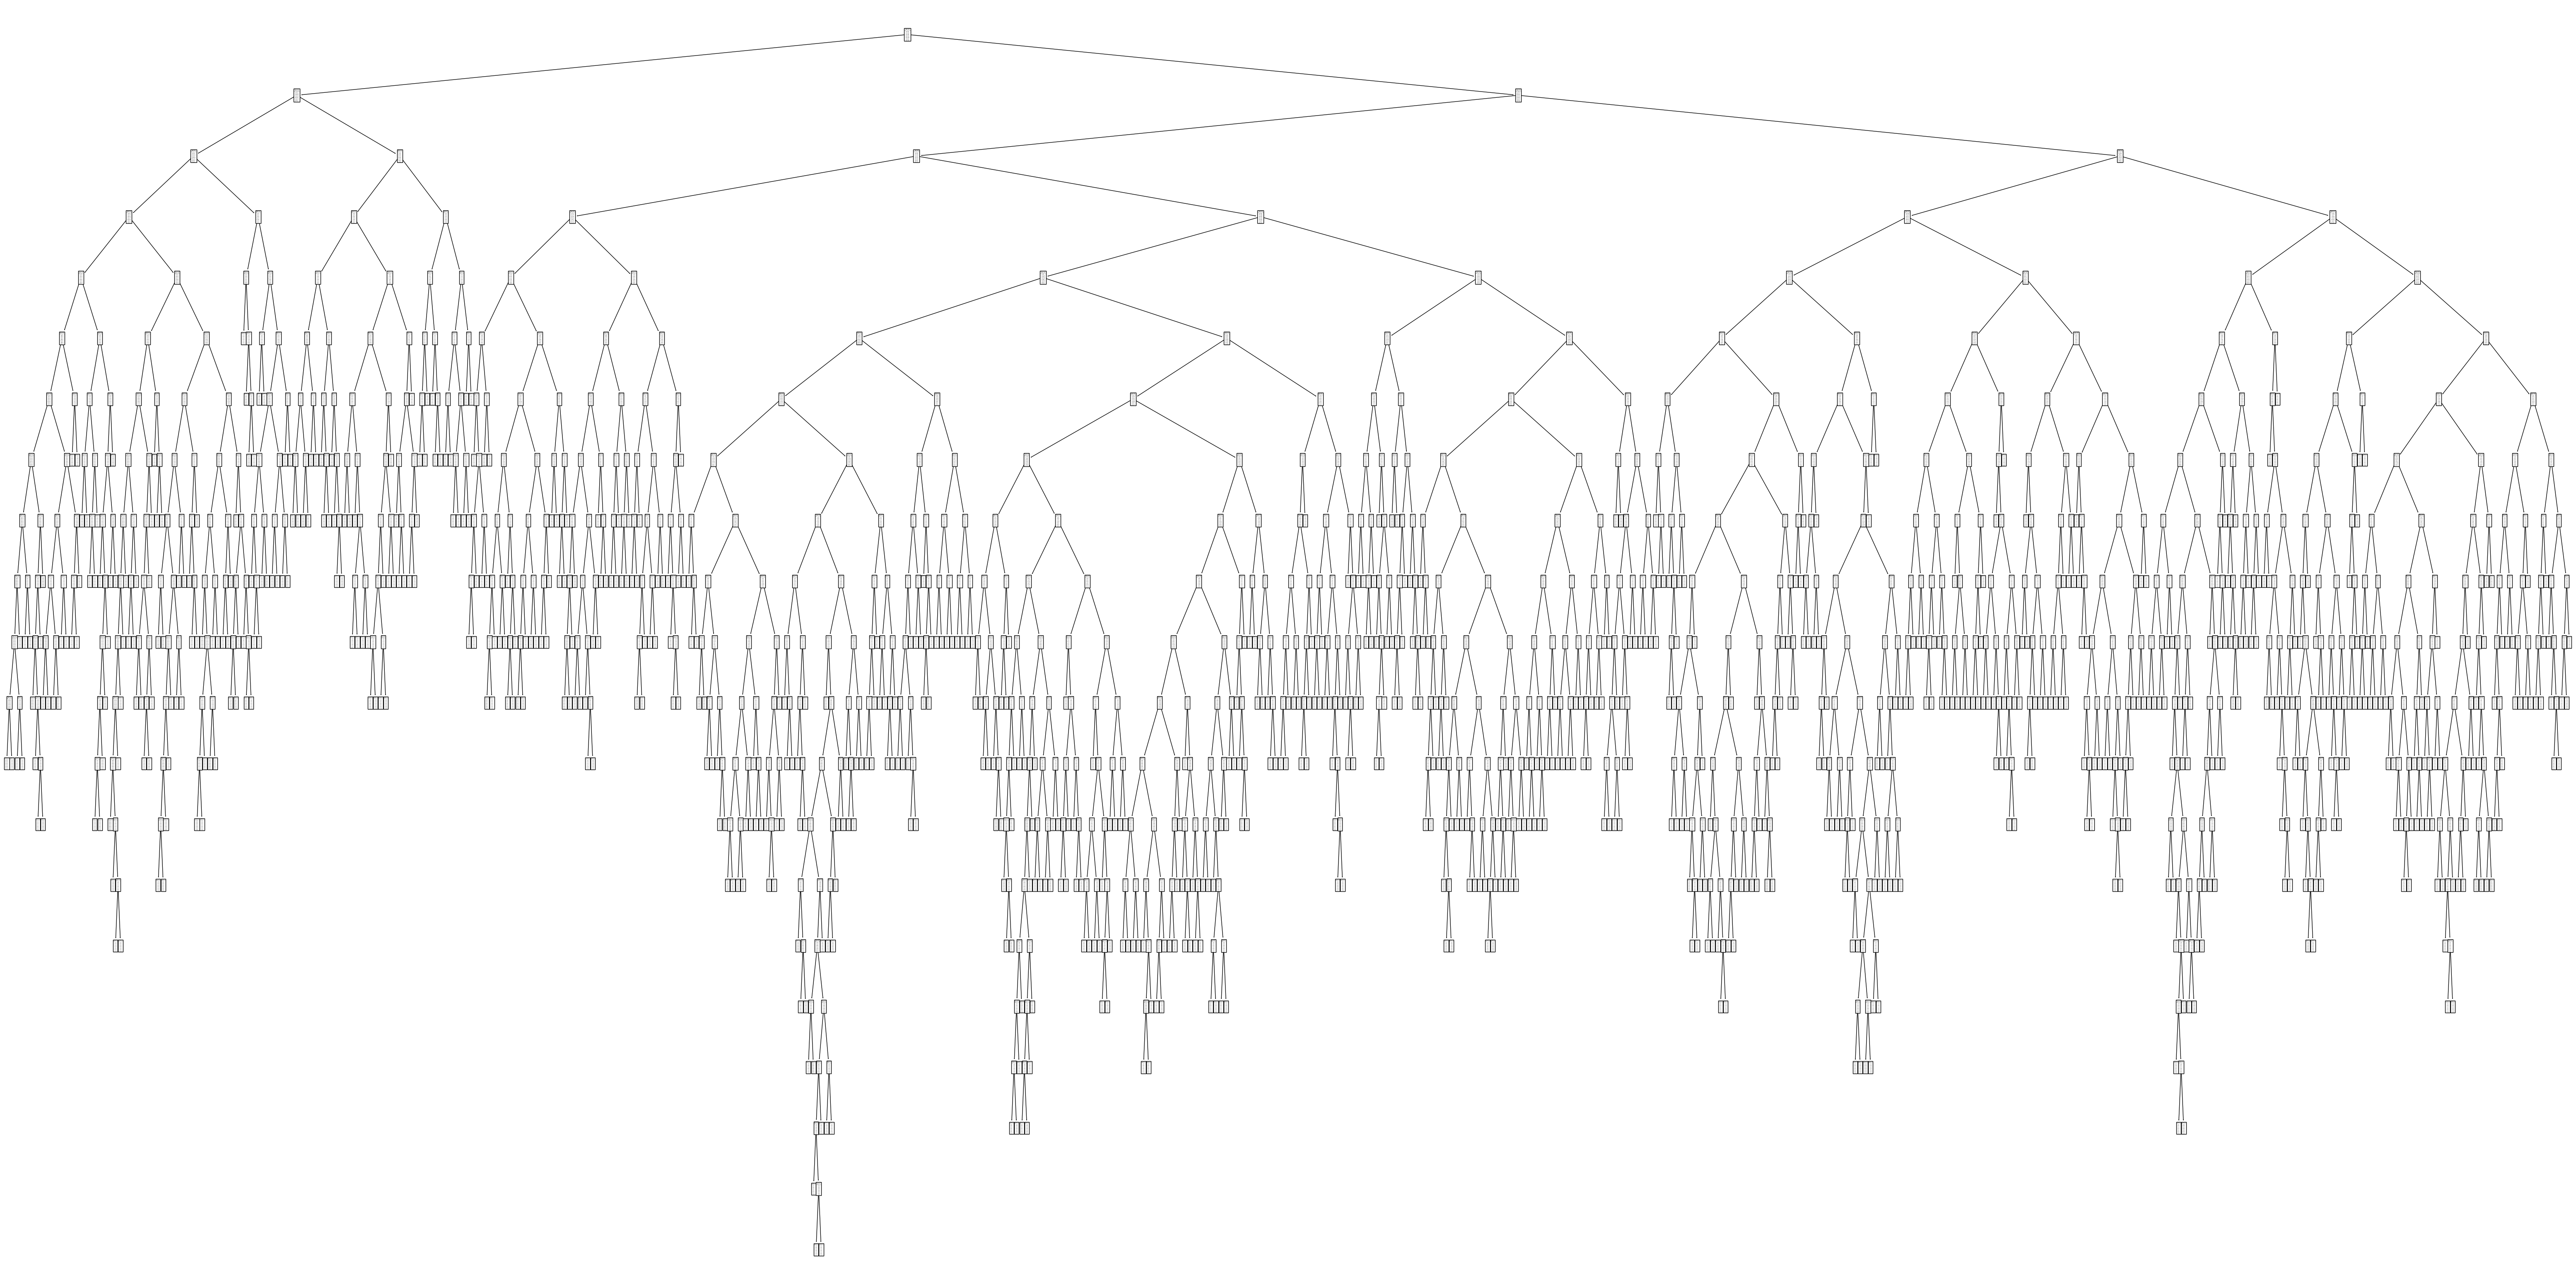

In [22]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[1], class_names=act);
#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [23]:
save_path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning\2.03 Complex Machine Learning Models and Keras Part 2'

fig.savefig(f"{save_path}/decision_tree_weather2010-01.png")

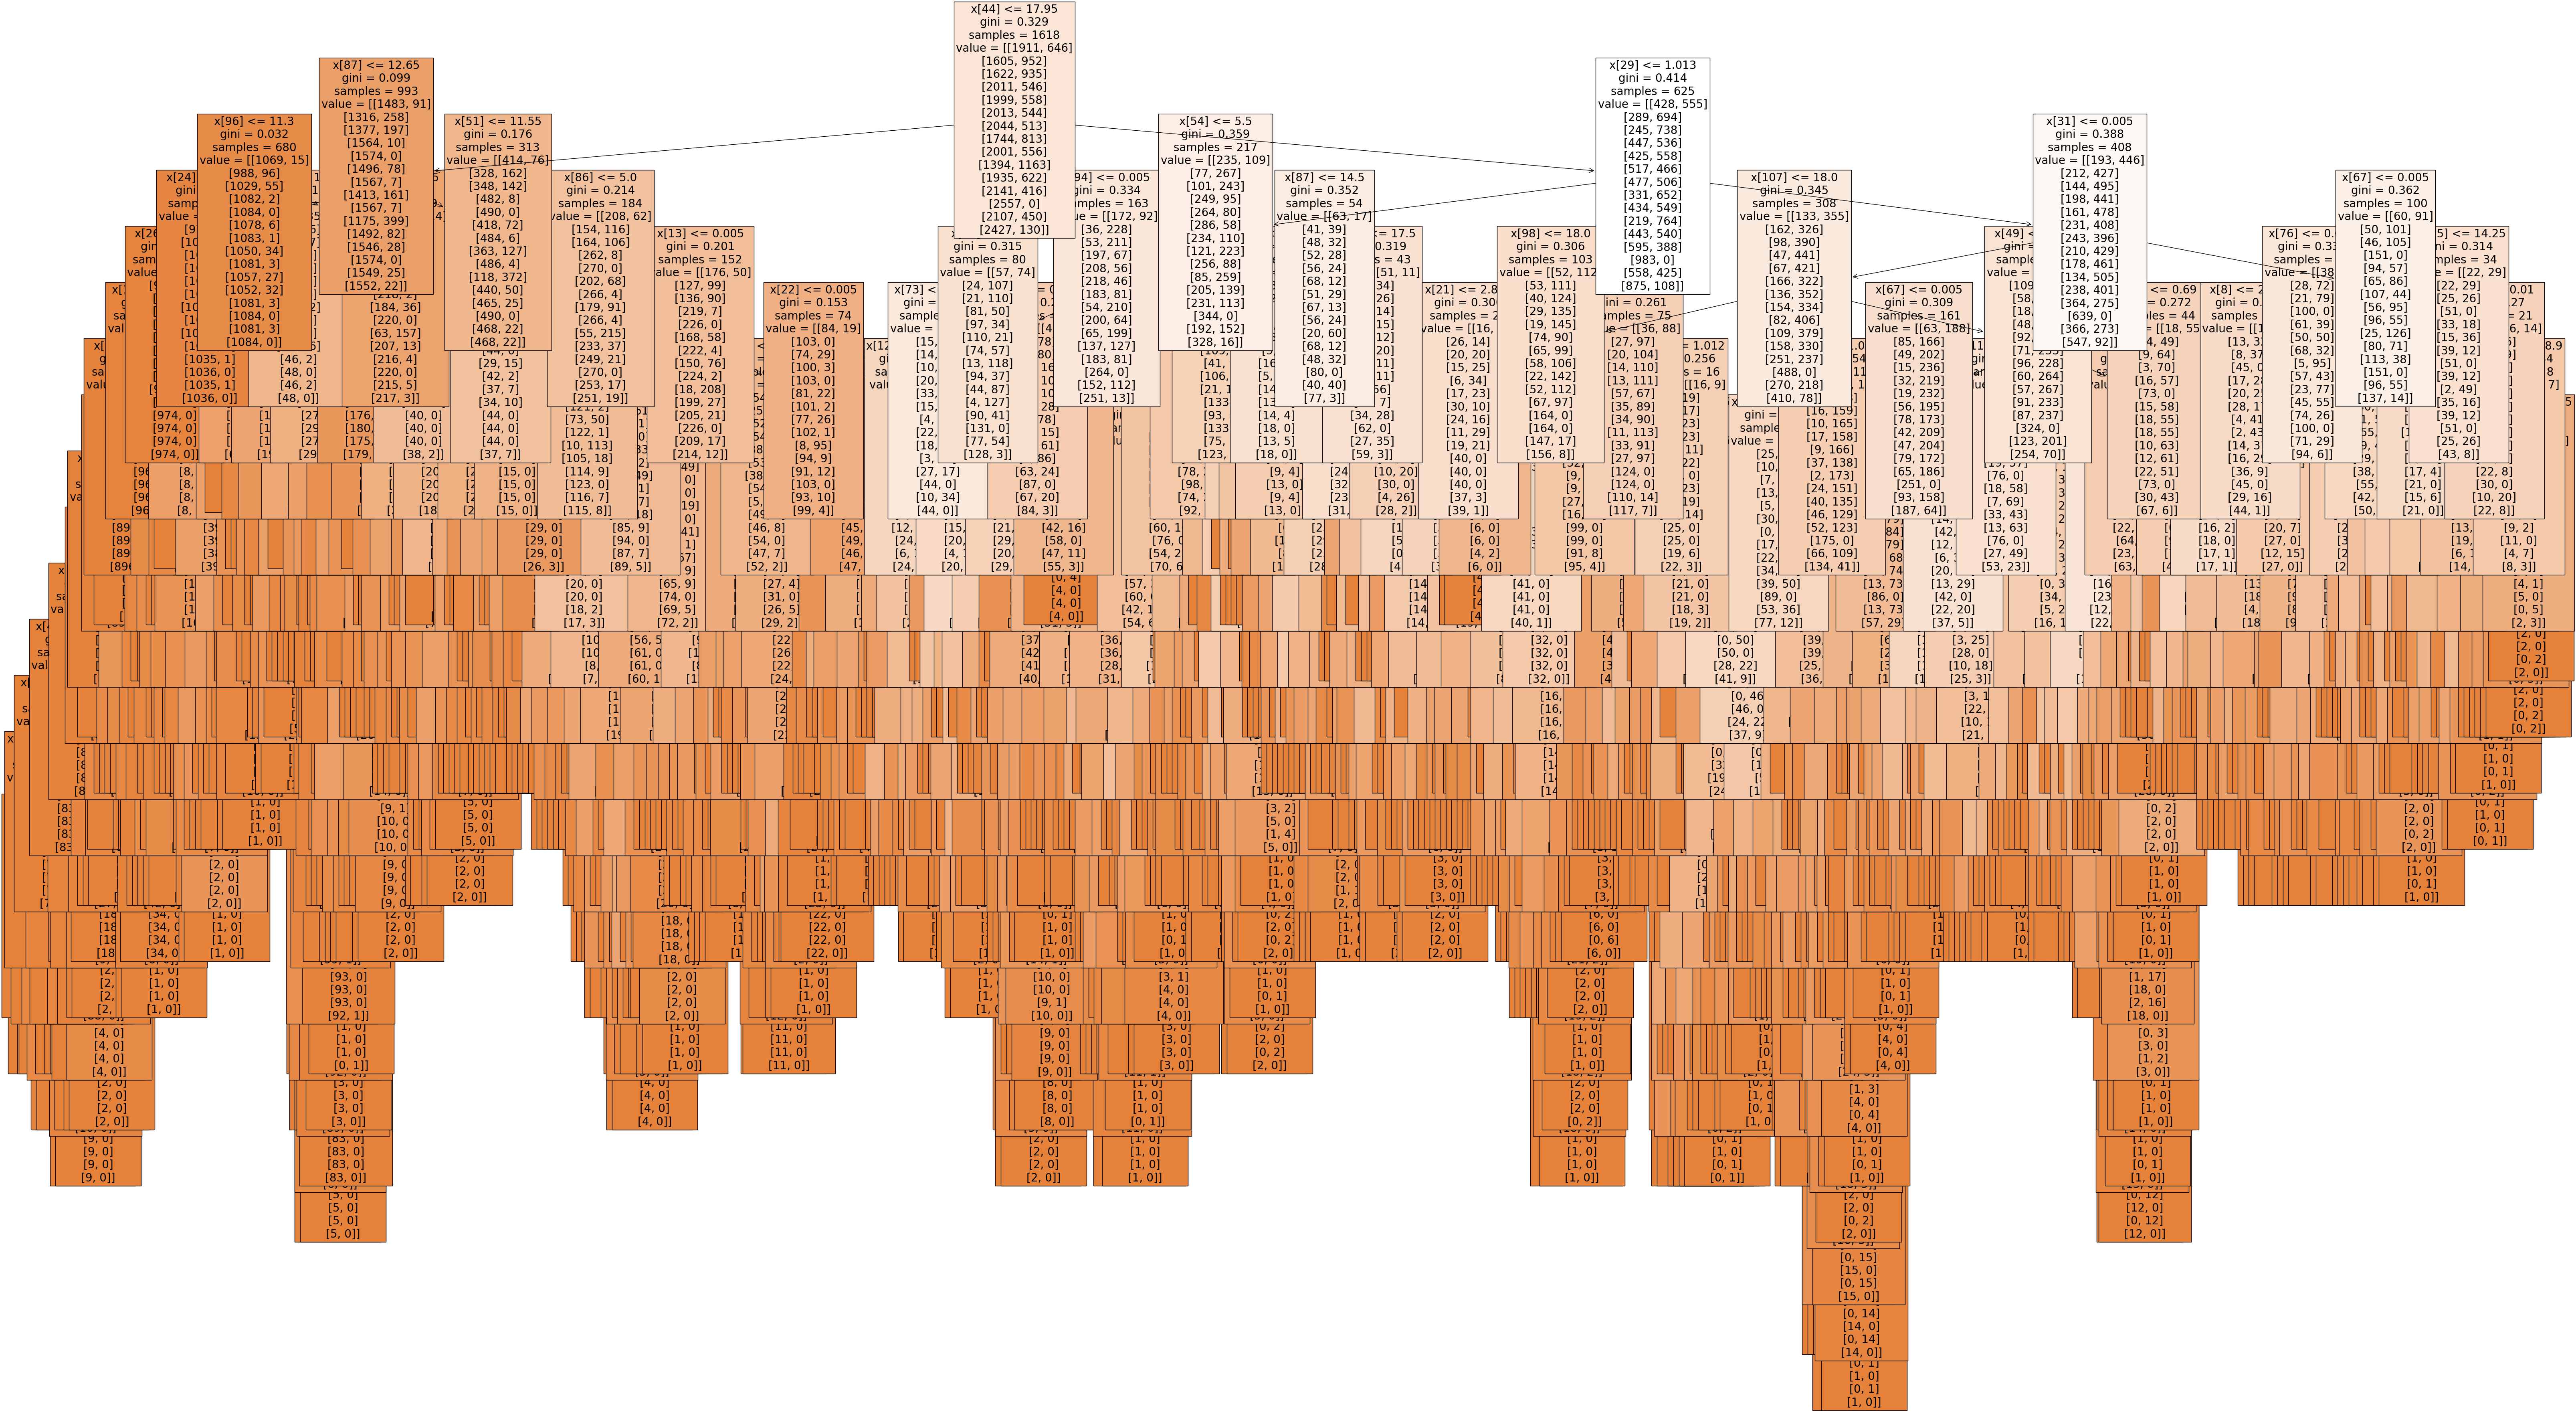

In [24]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=act, filled=True);

In [25]:
fig.savefig(f"{save_path}/decision_tree_weather2010-02.png")

# Find the most relevant locations

In [26]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00272208, 0.00284366, 0.00327589, 0.00417177, 0.01186738,
       0.00769231, 0.00827189, 0.00744392, 0.0393247 , 0.00330801,
       0.00385334, 0.00354961, 0.00354784, 0.01640793, 0.00409805,
       0.00617128, 0.00309941, 0.01039485, 0.00259978, 0.00370887,
       0.00287565, 0.00391129, 0.01148534, 0.00462019, 0.01742833,
       0.00305913, 0.01543273, 0.00352406, 0.00213924, 0.00532717,
       0.00458456, 0.01967473, 0.00522767, 0.0127324 , 0.0026761 ,
       0.03932102, 0.00446627, 0.00275228, 0.00421336, 0.00453304,
       0.01906009, 0.00697031, 0.0249214 , 0.00268349, 0.04861687,
       0.00190942, 0.00335309, 0.00457026, 0.00353921, 0.00881445,
       0.00386301, 0.00983132, 0.00283003, 0.01120828, 0.00335524,
       0.0028948 , 0.00416454, 0.00332194, 0.01069397, 0.00422396,
       0.01396331, 0.00291686, 0.02100017, 0.00374863, 0.00387108,
       0.00306005, 0.00445623, 0.0153711 , 0.00462261, 0.0045831 ,
       0.00261864, 0.00899425, 0.00890626, 0.00434625, 0.00309

In [27]:
np.set_printoptions(threshold=1000)

In [28]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00272208, 0.00284366, 0.00327589, 0.00417177, 0.01186738,
         0.00769231, 0.00827189, 0.00744392, 0.0393247 ],
        [0.00330801, 0.00385334, 0.00354961, 0.00354784, 0.01640793,
         0.00409805, 0.00617128, 0.00309941, 0.01039485],
        [0.00259978, 0.00370887, 0.00287565, 0.00391129, 0.01148534,
         0.00462019, 0.01742833, 0.00305913, 0.01543273],
        [0.00352406, 0.00213924, 0.00532717, 0.00458456, 0.01967473,
         0.00522767, 0.0127324 , 0.0026761 , 0.03932102],
        [0.00446627, 0.00275228, 0.00421336, 0.00453304, 0.01906009,
         0.00697031, 0.0249214 , 0.00268349, 0.04861687],
        [0.00190942, 0.00335309, 0.00457026, 0.00353921, 0.00881445,
         0.00386301, 0.00983132, 0.00283003, 0.01120828],
        [0.00335524, 0.0028948 , 0.00416454, 0.00332194, 0.01069397,
         0.00422396, 0.01396331, 0.00291686, 0.02100017],
        [0.00374863, 0.00387108, 0.00306005, 0.00445623, 0.0153711 ,
         0.00462261, 0.0045831 , 0.0026186

In [29]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.08761361, 0.05443032, 0.06512132, 0.09520696, 0.11821712,
       0.04991905, 0.0665348 , 0.05132569, 0.11813284, 0.06145092,
       0.08657176, 0.04656804, 0.02758577, 0.04208122, 0.02924058])

In [30]:
important = pd.Series(sumarray, index = locations) #.sort_values(ascending = False)
important

BASEL         0.087614
BELGRADE      0.054430
BUDAPEST      0.065121
DEBILT        0.095207
DUSSELDORF    0.118217
HEATHROW      0.049919
KASSEL        0.066535
LJUBLJANA     0.051326
MAASTRICHT    0.118133
MADRID        0.061451
MUNCHENB      0.086572
OSLO          0.046568
SONNBLICK     0.027586
STOCKHOLM     0.042081
VALENTIA      0.029241
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


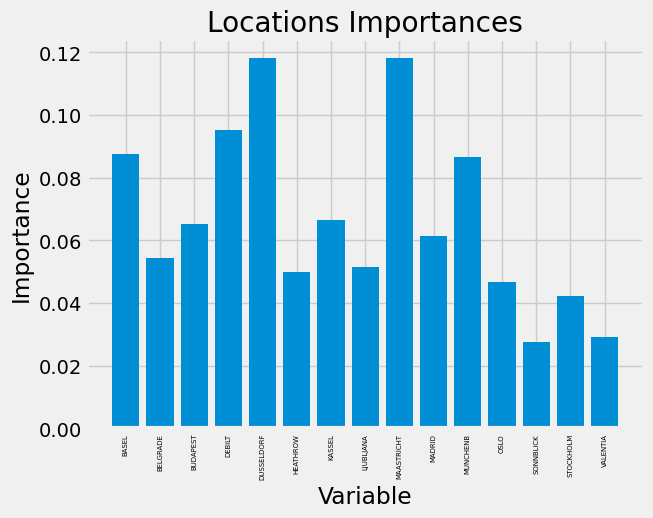

In [31]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, locations, rotation = 'vertical', fontsize = 5)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Locations Importances')
plt.savefig(f"{save_path}/Location_Importances2000.png")

### Most important places are:
Deblit

Dusseldorf

Maastricht

Though these are closely followed by Munchen, and Basel.

# Find the most important measures

In [32]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00272208, 0.00284366, 0.00327589, 0.00417177, 0.01186738,
       0.00769231, 0.00827189, 0.00744392, 0.0393247 , 0.00330801,
       0.00385334, 0.00354961, 0.00354784, 0.01640793, 0.00409805,
       0.00617128, 0.00309941, 0.01039485, 0.00259978, 0.00370887,
       0.00287565, 0.00391129, 0.01148534, 0.00462019, 0.01742833,
       0.00305913, 0.01543273, 0.00352406, 0.00213924, 0.00532717,
       0.00458456, 0.01967473, 0.00522767, 0.0127324 , 0.0026761 ,
       0.03932102, 0.00446627, 0.00275228, 0.00421336, 0.00453304,
       0.01906009, 0.00697031, 0.0249214 , 0.00268349, 0.04861687,
       0.00190942, 0.00335309, 0.00457026, 0.00353921, 0.00881445,
       0.00386301, 0.00983132, 0.00283003, 0.01120828, 0.00335524,
       0.0028948 , 0.00416454, 0.00332194, 0.01069397, 0.00422396,
       0.01396331, 0.00291686, 0.02100017, 0.00374863, 0.00387108,
       0.00306005, 0.00445623, 0.0153711 , 0.00462261, 0.0045831 ,
       0.00261864, 0.00899425, 0.00890626, 0.00434625, 0.00309

In [33]:
np.set_printoptions(threshold=1000)

In [34]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00272208, 0.00284366, 0.00327589, 0.00417177, 0.01186738,
         0.00769231, 0.00827189, 0.00744392, 0.0393247 ],
        [0.00330801, 0.00385334, 0.00354961, 0.00354784, 0.01640793,
         0.00409805, 0.00617128, 0.00309941, 0.01039485],
        [0.00259978, 0.00370887, 0.00287565, 0.00391129, 0.01148534,
         0.00462019, 0.01742833, 0.00305913, 0.01543273],
        [0.00352406, 0.00213924, 0.00532717, 0.00458456, 0.01967473,
         0.00522767, 0.0127324 , 0.0026761 , 0.03932102],
        [0.00446627, 0.00275228, 0.00421336, 0.00453304, 0.01906009,
         0.00697031, 0.0249214 , 0.00268349, 0.04861687],
        [0.00190942, 0.00335309, 0.00457026, 0.00353921, 0.00881445,
         0.00386301, 0.00983132, 0.00283003, 0.01120828],
        [0.00335524, 0.0028948 , 0.00416454, 0.00332194, 0.01069397,
         0.00422396, 0.01396331, 0.00291686, 0.02100017],
        [0.00374863, 0.00387108, 0.00306005, 0.00445623, 0.0153711 ,
         0.00462261, 0.0045831 , 0.0026186

In [35]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.04813917, 0.04907614, 0.05366137, 0.05803798, 0.17832804,
       0.0723092 , 0.18279227, 0.05698946, 0.30066637])

In [36]:
important = pd.Series(sumarray, index = signals) #.sort_values(ascending = False)
important

cloud_cover         0.048139
humidity            0.049076
pressure            0.053661
global_radiation    0.058038
precipitation       0.178328
sunshine            0.072309
temp_mean           0.182792
temp_min            0.056989
temp_max            0.300666
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


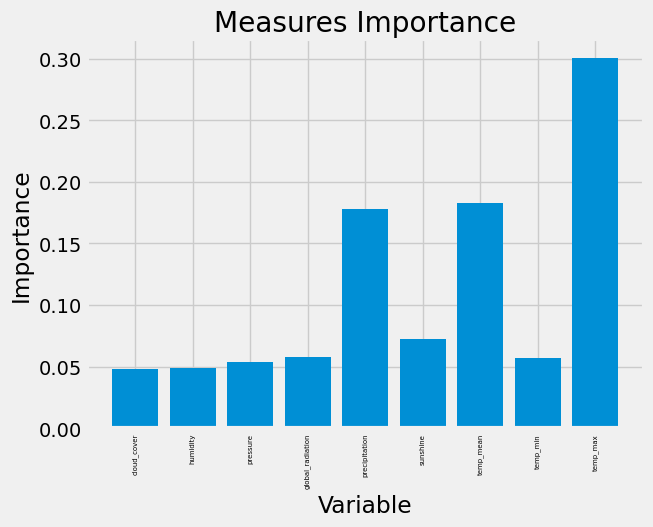

In [37]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, signals, rotation = 'vertical', fontsize = 5)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Measures Importance')
plt.savefig(f"{save_path}/Measure_Importances2000.png")

### The most improatnt measures are:
precipitation

temp_mean

temp_max

They are significantly more important than the other measures of 'pleasantness'.

they are also better at indicating than any of the individual locations.